In [1]:
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
data = xr.DataArray(
    np.random.randn(2, 3), dims=('x', 'y'), coords={'x': [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.49199532,  0.30024865, -0.51415582],
       [ 0.87634267, -0.40022889, -0.71723099]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [3]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [4]:
data.values

array([[-0.49199532,  0.30024865, -0.51415582],
       [ 0.87634267, -0.40022889, -0.71723099]])

In [5]:
type(data.values)

numpy.ndarray

In [6]:
data.dims

('x', 'y')

In [7]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [8]:
data.attrs

{}

In [9]:
data[0, :]

<xarray.DataArray (y: 3)>
array([-0.49199532,  0.30024865, -0.51415582])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [10]:
data.loc[10]

<xarray.DataArray (y: 3)>
array([-0.49199532,  0.30024865, -0.51415582])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [11]:
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([-0.49199532,  0.30024865, -0.51415582])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [12]:
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([-0.49199532,  0.30024865, -0.51415582])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [13]:
data.attrs['long_name'] = 'random velocity'
data.attrs['units'] = 'm/s'
data.attrs['description'] = 'A random variable created as an example'
data.attrs['random_attribute'] = 123
data.attrs

{'long_name': 'random velocity',
 'units': 'm/s',
 'description': 'A random variable created as an example',
 'random_attribute': 123}

In [14]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[ 9.50800468, 10.30024865,  9.48584418],
       [10.87634267,  9.59977111,  9.28276901]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [15]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[-0.47238549,  0.29575774, -0.49179999],
       [ 0.76840346, -0.38962915, -0.65730039]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             m/s
    description:       A random variable created as an example
    random_attribute:  123

In [16]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[-0.49199532,  0.87634267],
       [ 0.30024865, -0.40022889],
       [-0.51415582, -0.71723099]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             m/s
    description:       A random variable created as an example
    random_attribute:  123

In [17]:
data.sum()

<xarray.DataArray ()>
array(-0.9470197)

In [18]:
data.sum(axis=1)

<xarray.DataArray (x: 2)>
array([-0.70590249, -0.24111721])
Coordinates:
  * x        (x) int64 10 20

In [19]:
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.19217368, -0.04999012, -0.6156934 ])
Dimensions without coordinates: y

In [20]:
a = xr.DataArray(np.random.randn(3), [data.coords['y']])
b = xr.DataArray(np.random.randn(4), dims='z')
a

<xarray.DataArray (y: 3)>
array([-1.04804182, -0.44964357, -2.12145963])
Coordinates:
  * y        (y) int64 0 1 2

In [21]:
b

<xarray.DataArray (z: 4)>
array([ 0.57052954,  0.37642449,  0.56269981, -0.46933867])
Dimensions without coordinates: z

In [22]:
a + b

<xarray.DataArray (y: 3, z: 4)>
array([[-0.47751228, -0.67161734, -0.48534201, -1.51738049],
       [ 0.12088597, -0.07321908,  0.11305625, -0.91898223],
       [-1.55093009, -1.74503514, -1.55875981, -2.59079829]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: z

In [23]:
data - data.T

<xarray.DataArray (x: 2, y: 3)>
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [24]:
data[:-1] - data[:1]

<xarray.DataArray (x: 1, y: 3)>
array([[0., 0., 0.]])
Coordinates:
  * x        (x) int64 10
Dimensions without coordinates: y

### GroupBy

In [26]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [27]:
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.50307557,  0.30024865],
       [ 0.07955584, -0.40022889]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

In [28]:
data.groupby(labels).map(lambda x: x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[0.22523567, 0.70047754, 0.20307517],
       [1.59357366, 0.        , 0.        ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

### Plotting

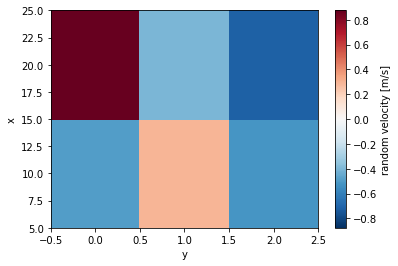

In [29]:
data.plot();

### pandas

In [31]:
series = data.to_series()
series

x   y
10  0   -0.491995
    1    0.300249
    2   -0.514156
20  0    0.876343
    1   -0.400229
    2   -0.717231
dtype: float64

In [32]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[-0.49199532,  0.30024865, -0.51415582],
       [ 0.87634267, -0.40022889, -0.71723099]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

### Datasets

In [33]:
ds = xr.Dataset(dict(foo=data, bar=('x', [1, 2]), baz=np.pi))
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 -0.492 0.3002 -0.5142 0.8763 -0.4002 -0.7172
    bar      (x) int64 1 2
    baz      float64 3.142

In [34]:
ds['foo']

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[-0.49199532,  0.30024865, -0.51415582],
       [ 0.87634267, -0.40022889, -0.71723099]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             m/s
    description:       A random variable created as an example
    random_attribute:  123

In [35]:
ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[-0.49199532,  0.30024865, -0.51415582],
       [ 0.87634267, -0.40022889, -0.71723099]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             m/s
    description:       A random variable created as an example
    random_attribute:  123

In [36]:
ds.bar.sel(x=10)

<xarray.DataArray 'bar' ()>
array(1)
Coordinates:
    x        int64 10

In [37]:
ds.to_netcdf('example.nc')

In [38]:
!cat example.nc

CDF       
      x         y                       foo                    	long_name         random velocity    units         m/s    description       'A random variable created as an example    random_attribute         {   
_FillValue        �            0      �   x                              �   bar                            �   baz              
_FillValue        �                  ���|��>;?�7F-���s��wDC?�
�ɛ�F�ٝY�cq���h��   
         @	!�TD-

In [39]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int32 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int32 ...
    baz      float64 ...